<h1>Импорт библиотек

In [6]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [7]:
def sum_prod(X, V):
    result = 0
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

def test():

    X1 = [np.array([[1, 2], [3, 4]])]
    V1 = [np.array([[1], [2]])]
    result1 = sum_prod(X1, V1)
    expected1 = np.array([[5], [11]])
    assert np.array_equal(result1, expected1)

    X2 = [
        np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
        np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
    ]
    V2 = [
        np.array([[1], [0], [0]]),
        np.array([[0], [1], [0]])
    ]
    result2 = sum_prod(X2, V2)
    expected2 = np.array([[9], [9], [9]])
    assert np.array_equal(result2, expected2)

    print("Все тесты пройдены")
    
test()

Все тесты пройдены


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [8]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

def test():
    M = np.array([[0.4, 0.5, 0.9], [0.2, 0.6, 0.9]])
    expected_result = np.array([[0, 0, 1], [0, 1, 1]])
    assert np.array_equal(binarize(M), expected_result)

    M = np.array([[0.1, 0.2, 0.3], [0.1, 0.6, 0.6]])
    expected_result = np.array([[0, 0, 0], [0, 1, 1]])
    assert np.array_equal(binarize(M, 0.4), expected_result)

    print("Все тесты пройдены")

test()

Все тесты пройдены


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [9]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

def test():
    mat = np.array([
        [4, 1, 4, 1],
        [2, 7, 1, 9],
        [5, 1, 4, 9],
        [0, 1, 2, 3]
    ])
    assert [list(r) for r in unique_rows(mat)] == [[1,4],[1,2,7,9],[1,4,5,9],[0,1,2,3]]
    assert [list(c) for c in unique_columns(mat)] == [[0,2,4,5],[1,7],[1,2,4],[1,3,9]]
    print("Все тесты пройдены")
test()

Все тесты пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Среднее по строкам: [-0.9071706  -0.29853306  0.33175387]
Дисперсия по строкам: [1.13528316 0.61948644 0.14842248]
Среднее по столбцам: [-0.52434026  0.26775153 -0.27500162 -0.63367605]
Дисперсия по столбцам: [1.24825208 0.31554144 0.48537798 1.02747794]


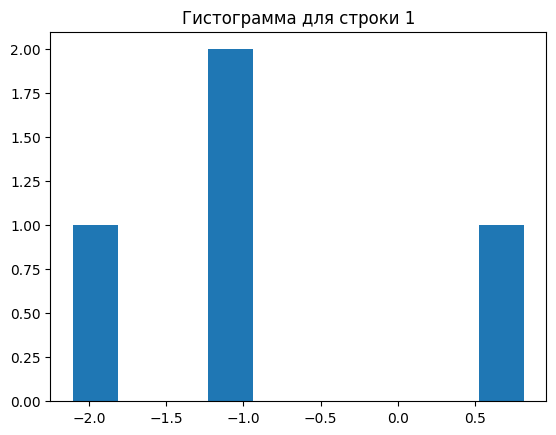

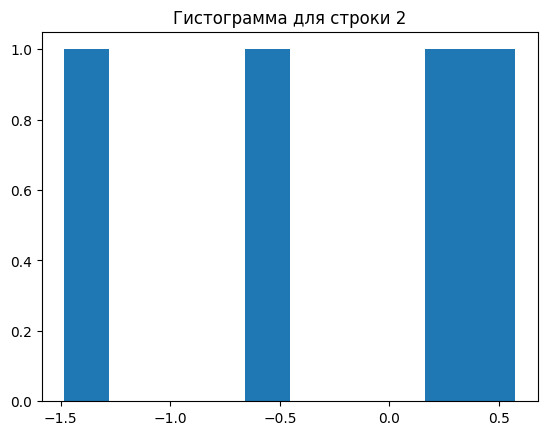

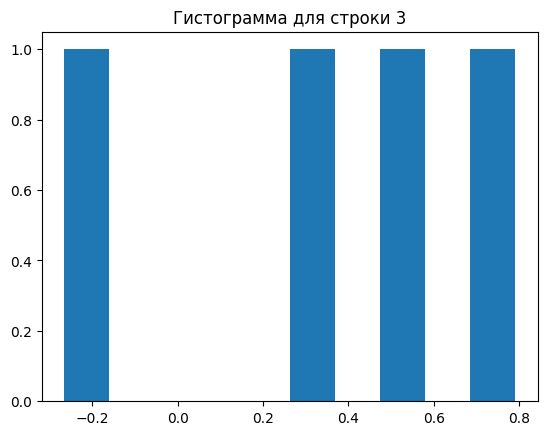

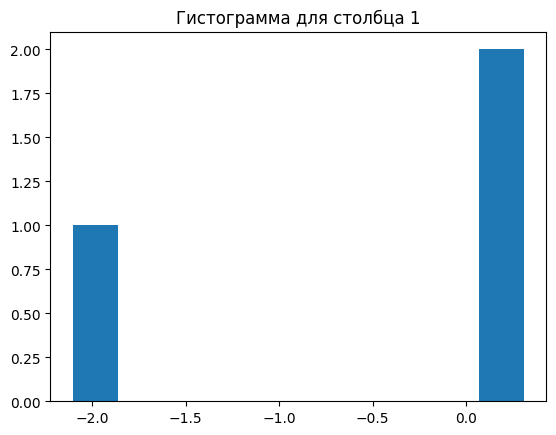

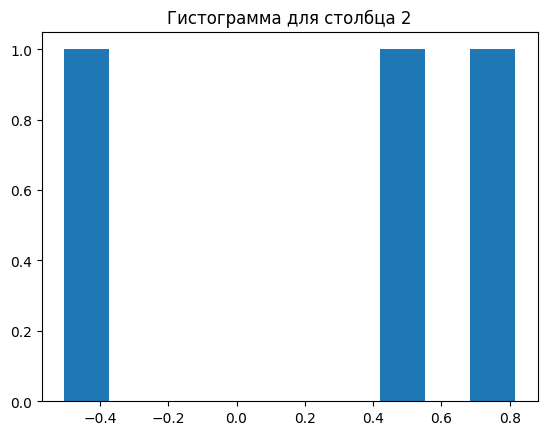

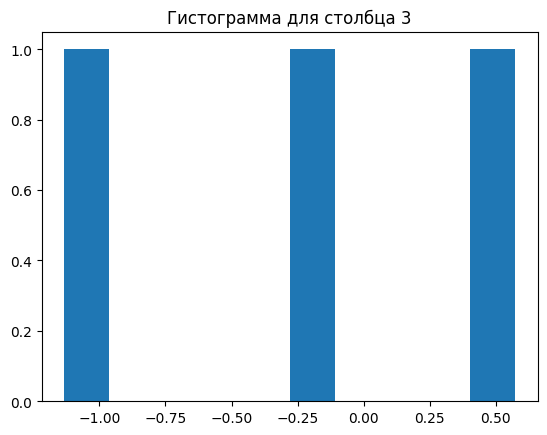

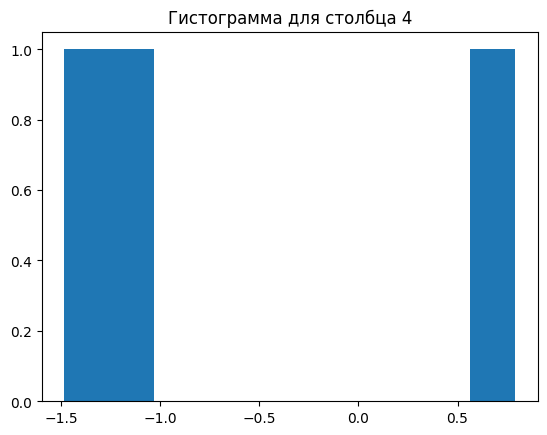

In [10]:
def matrix(m,n):
    mat = np.random.normal(size=(m,n))

    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)

    print("Среднее по строкам:", row_means)
    print("Дисперсия по строкам:", row_vars)
    print("Среднее по столбцам:", col_means)
    print("Дисперсия по столбцам:", col_vars)

    for i in range(m):
        plt.hist(mat[i, :])
        plt.title(f"Гистограмма для строки {i+1}")
        plt.show()
    
    for j in range(n):
        plt.hist(mat[:, j])
        plt.title(f"Гистограмма для столбца {j+1}")
        plt.show()

matrix(3,4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
def chess(m, n, a, b):
    pattern = np.indices((m, n)).sum(axis=0) % 2
    return np.where(pattern, b, a)

def test():
    expected1 = np.array([[5, 10, 5], [10, 5, 10], [5, 10, 5]])
    result1 = chess(3, 3, 5, 10)
    assert np.array_equal(result1, expected1)
    
    expected2 = np.array([[1, 2, 1, 2], [2, 1, 2, 1], [1, 2, 1, 2]])
    result2 = chess(3, 4, 1, 2)
    assert np.array_equal(result2, expected2)
    
    print("Все тесты пройдены")

test()

Все тесты пройдены


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

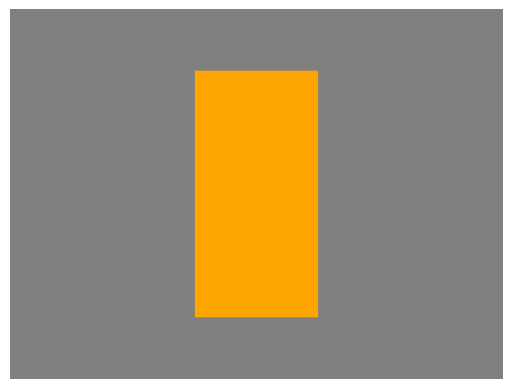

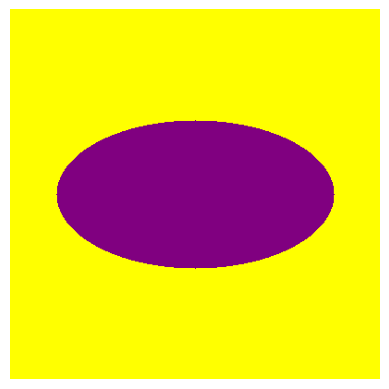

In [12]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)

    start_row = (m - a) // 2
    end_row = start_row + a
    start_col = (n - b) // 2
    end_col = start_col + b
    image[start_row:end_row, start_col:end_col] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)

    x0 = m // 2
    y0 = n // 2
    x, y = np.meshgrid(np.arange(m), np.arange(n))

    distances = ((x - x0) / a) ** 2 + ((y - y0) / b) ** 2
    image[distances <= 1] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

draw_rectangle (200,100, 300, 400, [255,165,0], [128,128,128])
draw_ellipse (150,80,400,400,[128,0,128],[255,255,0])

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [13]:
def analyze_time_series(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)
    maxima = []
    minima = []
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            minima.append(i)
    window = np.ones (p) / p
    moving_avg = np.convolve(series, window, 'valid')
    
    return {
        'Мат.ожидание': round(float(mean), 4),
        'Дисперсия': round(float(variance), 4),
        'СКО': round(float(std), 4),
        'Локальные максимумы(индексы)': maxima,
        'Локальные минимумы (индексы)': minima,
        'Скользящее среднее': [float(round(x, 4)) for x in moving_avg]
        }

data = [1, 3, 7, 1, 2, 0, 4, 2, 3]
analyze_time_series(data, p=3)

{'Мат.ожидание': 2.5556,
 'Дисперсия': 3.8025,
 'СКО': 1.95,
 'Локальные максимумы(индексы)': [2, 4, 6],
 'Локальные минимумы (индексы)': [3, 5, 7],
 'Скользящее среднее': [3.6667, 3.6667, 3.3333, 1.0, 2.0, 2.0, 3.0]}

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [14]:
def one_hot_encode(labels):
    n_classes = np.max(labels) + 1
    return np.eye(n_classes)[labels]

one_hot_encode([0, 2, 3, 0])

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])